In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
df =  pd.read_csv("cleaned_flats")

In [3]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [4]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [5]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [6]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [7]:
df.head(1)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,...,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0


In [9]:
df.head(50)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,...,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.000000
1,1,1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,...,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,650.000000
2,2,2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,...,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,595.000000
3,3,3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,...,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,NaN,NaN,1200.000000
4,4,4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,...,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",1345.0,NaN,NaN
5,5,5,2 BHK Flat in Sector 36 Gurgaon,signature global infinity mall,0.41,6269.0,Built Up area: 654 (60.76 sq.m.),2,2,3,...,NaN,undefined,NaN,Best in class property available at sector 36 ...,NaN,NaN,NaN,NaN,654.000000,NaN
6,6,6,3 BHK Flat in Dwarka Expressway Gurgaon,the cocoon,2.00,13333.0,Super Built up area 1500(139.35 sq.m.),3,3,3,...,NaN,0 to 1 Year Old,"['Shri Multispeciality Hospital', 'Esic Hospit...",Residential apartment for sell.The property co...,[],NaN,NaN,1500.0,NaN,NaN
7,7,7,3 BHK Flat in Sector 104 Gurgaon,ats triumph,1.80,7860.0,Carpet area: 2290 (212.75 sq.m.),3,4,3,...,NaN,0 to 1 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade M...",Ats triumph is one of gurgaon's most sought af...,[],"['Power Back-up', 'Intercom Facility', 'Lift(s...","['Green Area4 out of 5', 'Amenities4.5 out of ...",NaN,NaN,2290.000000
8,8,8,2 BHK Flat in Sector 88B Gurgaon,vatika xpressions,1.10,8148.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,2,4,4,...,North-East,Under Construction,"['Dwarka Expressway', 'Adarsh public school,Ga...",We are the proud owners of this 2 bhk apartmen...,NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",NaN,NaN,1350.000000,1050.000000
9,9,9,3 BHK Flat in Sector 78 Gurgaon,raheja revanta,4.75,16885.0,Built Up area: 2813 (261.34 sq.m.),3,3,2,...,NaN,Dec 2023,"['Sapphire 83 Mall', 'NH-8', 'Bal Bharti Publi...","This 3 bhk flat is located in raheja revanta, ...",NaN,"['Security / Fire Alarm', 'Intercom Facility',...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,2813.000000,NaN


In [10]:
df['additionalRoom'].value_counts()

additionalRoom
not_available                                    1305
servant room                                      629
study room                                        232
others                                            179
pooja room                                        132
study room,servant room                            81
store room                                         76
pooja room,servant room                            60
servant room,others                                52
servant room,pooja room                            30
study room,others                                  27
pooja room,study room,servant room,others          25
pooja room,study room,servant room                 24
servant room,store room                            19
pooja room,study room                              13
pooja room,study room,servant room,store room      12
study room,pooja room                               8
servant room,study room                             8
study room,se

In [11]:
new_colms = ['study room','pooja room','store room','others','servant room']

In [12]:

for column in new_colms:
    df[column] = df['additionalRoom'].str.contains(column).astype(int)

In [13]:
df

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,...,"['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0
1,1,1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,...,"['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,650.0,0,0,0,0,0
2,2,2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,...,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,595.0,0,0,0,0,0
3,3,3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,...,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,NaN,NaN,1200.0,1,0,0,0,0
4,4,4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,...,NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",1345.0,NaN,NaN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,3004,3023,3 BHK Flat in Sector 86 Gurgaon,ansal heights 86,1.05,5541.0,Super Built up area 1895(176.05 sq.m.),3,3,3,...,NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",1895.0,NaN,NaN,0,0,0,0,1
2993,3005,3024,5 BHK Flat in Sector 48 Gurgaon,parsvnath green ville,3.30,9984.0,Super Built up area 3905(362.79 sq.m.)Built Up...,5,5,4,...,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",3905.0,3305.0,NaN,0,0,0,0,1
2994,3006,3025,3 BHK Flat in Sector 108 Gurgaon,raheja vedaanta,0.95,5214.0,Super Built up area 1822(169.27 sq.m.),3,3,3,...,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management3 out of 5', 'Green Area4 out of 5...",1822.0,NaN,NaN,0,0,0,1,0
2995,3007,3026,3 BHK Flat in DLF Phase 3,ambience lagoon,5.80,12500.0,Built Up area: 3700 (343.74 sq.m.),3,4,4,...,"['Security / Fire Alarm', 'Private Garden / Te...","['Management5 out of 5', 'Green Area5 out of 5...",NaN,3700.0,NaN,1,1,0,1,1


In [14]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [15]:
df.shape

(2997, 28)

In [16]:
df.head(1)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not_available,"Krishna Colony, Gurgaon, Haryana",4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0


In [17]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1478
0 to 1 Year Old        442
5 to 10 Year Old       360
undefined              216
10+ Year Old           137
Under Construction      90
Within 6 months         63
Within 3 months         25
Dec 2023                20
By 2023                 19
By 2024                 16
Dec 2024                15
Mar 2024                14
Aug 2023                 7
Oct 2024                 7
Dec 2025                 7
Jan 2024                 7
Jun 2024                 5
Nov 2023                 5
Aug 2024                 5
Jul 2024                 4
Sep 2023                 4
Jan 2025                 4
By 2025                  4
Nov 2024                 3
May 2024                 3
Oct 2023                 3
Feb 2024                 3
Jun 2027                 2
Mar 2025                 2
Jan 2026                 2
Aug 2025                 2
Jul 2025                 2
Oct 2025                 2
Jul 2027                 2
Apr 2026                 2
Dec 2026      

In [18]:
def categorized_age_possesion(value):
    if pd.isna(value):
        return 'undefined'
    
    if '1 to 5 Year Old' in value or '0 to 1 Year Old' in value or 'Within 6 months' in value or 'Within 3 months' in value:
        return 'new_property'
    if '5 to 10 Year Old' in value or '10+ Year Old' in value:
        return 'old_property'
    try:
        isint(value.split(' ')[1])
        return 'under_construction'
    except:
        return 'undefined'

In [19]:
df['agePossession'] = df['agePossession'].apply(categorized_age_possesion)

In [20]:
df.head(5)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not_available,"Krishna Colony, Gurgaon, Haryana",4.0,West,new_property,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0
1,1,1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not_available,"46b, Ashok Vihar, Gurgaon, Haryana",1.0,West,old_property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,650.0,0,0,0,0,0
2,2,2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not_available,"Sohna, Gurgaon, Haryana",12.0,NaN,new_property,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,595.0,0,0,0,0,0
3,3,3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2.0,NaN,undefined,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,NaN,NaN,1200.0,1,0,0,0,0
4,4,4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5.0,NaN,undefined,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",1345.0,NaN,NaN,1,0,0,0,0


# df['furnishDetails'

In [21]:
df['furnishDetails'][0]

"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"

In [22]:
all_values = []
for detail in df['furnishDetails'].dropna():
    frequent_values = detail.replace('[' , '').replace("'" , "").replace(']','').split(',')
    all_values.extend(frequent_values)

In [23]:
value = []
for i in all_values:
    value.append(re.sub(r'\d+|No ','',i).strip())

In [24]:
def main_function(detail , unique_value):
    if isinstance(detail, str):
        if f'No {unique_value}' in detail:
            return 0
    
        pattern = re.compile(f'(\d+) {unique_value}')
        match =  pattern.search(detail)
        if match:
            return int(match.group(1))
        elif unique_value in detail:
            return 1
    return 0

In [25]:
columns_new_data = []
for unique_value in list(set(value)):
    if '' == unique_value:
        pass
    else:
        columns_new_data.append(unique_value)
        df[unique_value] = df['furnishDetails'].apply(lambda x : main_function(x, unique_value))

In [26]:
columns_new_data

['Fan',
 'Exhaust Fan',
 'Sofa',
 'Geyser',
 'Water Purifier',
 'Wardrobe',
 'Stove',
 'Washing Machine',
 'Curtains',
 'Microwave',
 'Light',
 'Dining Table',
 'AC',
 'Bed',
 'Fridge',
 'Modular Kitchen',
 'TV',
 'Chimney']

In [27]:
df.columns

Index(['Unnamed: 0', 'index', 'property_name', 'society', 'price',
       'price_per_sqft', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'description', 'furnishDetails', 'features',
       'rating', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'pooja room', 'store room', 'others', 'servant room',
       'Fan', 'Exhaust Fan', 'Sofa', 'Geyser', 'Water Purifier', 'Wardrobe',
       'Stove', 'Washing Machine', 'Curtains', 'Microwave', 'Light',
       'Dining Table', 'AC', 'Bed', 'Fridge', 'Modular Kitchen', 'TV',
       'Chimney'],
      dtype='object')

In [28]:
new_data_frame =  df[['furnishDetails'] + columns_new_data]

In [29]:
new_data_frame.drop('furnishDetails', inplace = True , axis = 1)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10668\1083661660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame.drop('furnishDetails', inplace = True , axis = 1)


In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit_transform(new_data_frame)

array([[ 0.43577904, -0.67024347, -0.20334247, ..., -0.81774583,
        -0.14263712, -0.64465074],
       [ 0.81302623,  1.49199515, -0.20334247, ...,  1.22287386,
        -0.14263712,  1.48546864],
       [-0.69596254, -0.67024347, -0.20334247, ..., -0.81774583,
        -0.14263712, -0.64465074],
       ...,
       [-0.69596254, -0.67024347, -0.20334247, ..., -0.81774583,
        -0.14263712, -0.64465074],
       [ 3.07650939,  1.49199515,  4.91781191, ...,  1.22287386,
        -0.14263712,  1.48546864],
       [ 1.56752062,  1.49199515, -0.20334247, ...,  1.22287386,
        -0.14263712,  1.48546864]])

In [32]:
wcss_reduced = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i ,init='k-means++', random_state=42)
    kmeans.fit(scaler.fit_transform(new_data_frame))
    wcss_reduced.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

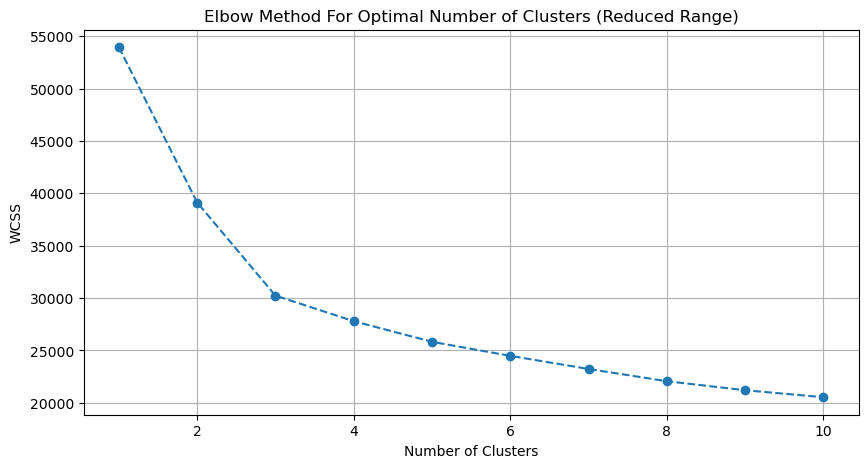

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [34]:
n_cluster = 3
kmeans = KMeans(n_clusters =  n_cluster,random_state = 42)
kmeans.fit(scaler.fit_transform(new_data_frame))
cluster_pridection = kmeans.predict(scaler.fit_transform(new_data_frame))

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
cluster_pridection.shape
# 0 - unfurnished
# 1- semi furnished
#2 - furnished

(2997,)

In [36]:
df['furnished_type'] = cluster_pridection

In [37]:
df.sample(5)[['furnishDetails','furnished_type']]

,furnishDetails,furnished_type
1218,[],0
1397,NaN,0
100,"['1 Exhaust Fan', '1 AC', '1 Chimney', '1 Modu...",0
1054,NaN,0
2604,"['6 Fan', '1 Exhaust Fan', '6 Light', '8 AC', ...",1


In [38]:
new_data_frame.columns

Index(['Fan', 'Exhaust Fan', 'Sofa', 'Geyser', 'Water Purifier', 'Wardrobe',
       'Stove', 'Washing Machine', 'Curtains', 'Microwave', 'Light',
       'Dining Table', 'AC', 'Bed', 'Fridge', 'Modular Kitchen', 'TV',
       'Chimney'],
      dtype='object')

In [39]:
df.drop(new_data_frame.columns, inplace = True , axis = 1)

In [40]:
df.head(1)

,Unnamed: 0,index,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,others,servant room,furnished_type
0,0,0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not_available,"Krishna Colony, Gurgaon, Haryana",4.0,West,new_property,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0,0


In [41]:
 df.to_csv('cleaned_flats_version2' , index = False)

# 

In [42]:
l = []
for i in pd.Series(df['features']).unique():
    l.append(i)

In [43]:
l2 = []
for i in l:
    i = str(i)
    x =  i.split(' ')
    for j in x:
        l2.append(j)

In [44]:
l3 = pd.Series(l2).value_counts()

In [45]:
l2.remove('/')

In [46]:
n_data = pd.DataFrame(l3)

In [47]:
new_column = n_data.index

In [48]:
n_data['new_column'] = new_column

In [49]:
n_data.drop('/', inplace = True , axis = 0)

In [50]:

n_data

,count,new_column
'Water,1812,'Water
"'Park',",1288,"'Park',"
"'Lift(s)',",1252,"'Lift(s)',"
"Staff',",1190,"Staff',"
'Maintenance,1186,'Maintenance
'Security,1161,'Security
'Fitness,1153,'Fitness
Centre,1153,Centre
'Club,1136,'Club
house,1136,house


In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [52]:
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

In [53]:
def fun(x):
    
    if pd.notnull(x) and x.startswith('['):
        return ast.literal_eval(x)
    else:
        return []

In [54]:
df['features_list'] = df['features'].apply(fun)

In [55]:
mlb = MultiLabelBinarizer()
feature_binary_matrix = mlb.fit_transform(df['features_list'])

In [56]:
feature_binary_matrix

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 0]])

In [57]:
mlb.classes_

array(['Airy Rooms', 'Bank Attached Property',
       'Centrally Air Conditioned', 'Club house / Community Center',
       'False Ceiling Lighting', 'Feng Shui / Vaastu Compliant',
       'Fitness Centre / GYM', 'High Ceiling Height', 'Intercom Facility',
       'Internet/wi-fi connectivity', 'Lift(s)', 'Low Density Society',
       'Maintenance Staff', 'Natural Light', 'No open drainage around',
       'Park', 'Piped-gas', 'Power Back-up', 'Private Garden / Terrace',
       'Rain Water Harvesting', 'Recently Renovated',
       'Security / Fire Alarm', 'Security Personnel',
       'Separate entry for servant room', 'Shopping Centre',
       'Spacious Interiors', 'Swimming Pool', 'Visitor Parking',
       'Waste Disposal', 'Water Storage', 'Water purifier',
       'Water softening plant'], dtype=object)

In [58]:
feature_binary_df = pd.DataFrame(feature_binary_matrix ,columns =  mlb.classes_)

In [59]:
feature_binary_df.head(1)

,Airy Rooms,Bank Attached Property,Centrally Air Conditioned,Club house / Community Center,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,High Ceiling Height,Intercom Facility,Internet/wi-fi connectivity,Lift(s),Low Density Society,Maintenance Staff,Natural Light,No open drainage around,Park,Piped-gas,Power Back-up,Private Garden / Terrace,Rain Water Harvesting,Recently Renovated,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Shopping Centre,Spacious Interiors,Swimming Pool,Visitor Parking,Waste Disposal,Water Storage,Water purifier,Water softening plant
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [60]:
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [133]:
feature_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

KeyError: '[\'24/7 Power Backup\', \'24/7 Water Supply\', \'24x7 Security\', \'ATM\', \'Aerobics Centre\', \'Amphitheatre\', \'Badminton Court\', \'Banquet Hall\', \'Bar/Chill-Out Lounge\', \'Barbecue\', \'Basketball Court\', \'Billiards\', \'Bowling Alley\', \'Business Lounge\', \'CCTV Camera Security\', \'Cafeteria\', \'Car Parking\', \'Card Room\', \'Changing Area\', "Children\'s Play Area", \'Cigar Lounge\', \'Clinic\', \'Club House\', \'Concierge Service\', \'Conference room\', \'Creche/Day care\', \'Cricket Pitch\', \'Doctor on Call\', \'Earthquake Resistant\', \'Entrance Lobby\', \'Fire Fighting Systems\', \'Flower Garden\', \'Food Court\', \'Foosball\', \'Football\', \'Fountain\', \'Gated Community\', \'Golf Course\', \'Grocery Shop\', \'Gymnasium\', \'High Speed Elevators\', \'Infinity Pool\', \'Internal Street Lights\', \'Jacuzzi\', \'Jogging Track\', \'Landscape Garden\', \'Laundry\', \'Lawn Tennis Court\', \'Library\', \'Lounge\', \'Manicured Garden\', \'Medical Centre\', \'Milk Booth\', \'Mini Theatre\', \'Multipurpose Court\', \'Multipurpose Hall\', \'Natural Pond\', \'Party Lawn\', \'Piped Gas\', \'Pool Table\', \'Power Back up Lift\', \'Property Staff\', \'RO System\', \'Reading Lounge\', \'Restaurant\', \'Salon\', \'Sauna\', \'Sewage Treatment Plant\', \'Skating Rink\', \'Solar Lighting\', \'Solar Water Heating\', \'Spa\', \'Squash Court\', \'Steam Room\', \'Sun Deck\', \'Temple\', \'Theatre\', \'Toddler Pool\', \'Valet Parking\', \'Video Door Security\', \'Water Softener Plant\', \'Yoga/Meditation Area\'] not in index'